In [502]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from math import *

# Download the dataset

In [503]:
df=pd.read_csv("online_shoppers_intention.csv")

# Checks on the dataset

In [504]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


There are 8 categoricals features

### Change the type of the categoricals features

In [505]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

We don't change the feature with a bool type(Weekend)

In [506]:
categorical_cols = ["VisitorType", "Month","OperatingSystems","TrafficType","Browser","Region"]

df[categorical_cols] = df[categorical_cols].astype("category")
df.dtypes



Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

In [507]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### Study of the Repartition

In [508]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

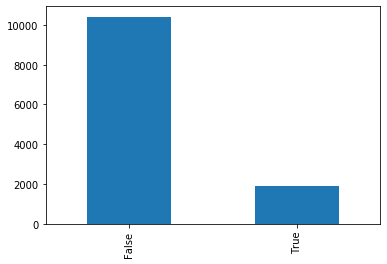

In [509]:
df.Revenue.value_counts().plot(kind="bar")

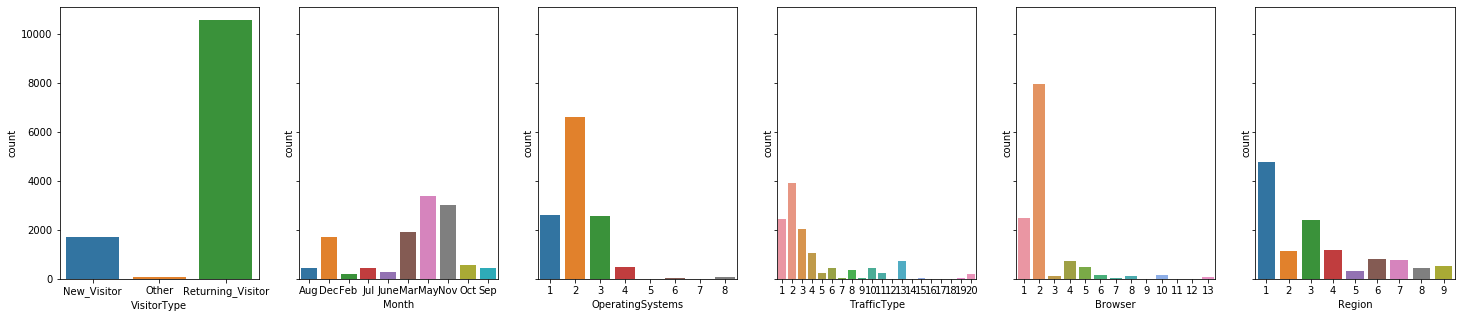

In [516]:
n = len(categorical_cols)

fig, axes = plt.subplots(1, n, figsize=(25,5), sharey=True)
for i, colname in enumerate(categorical_cols):
    sns.barplot(x=colname, data=df, ax=axes[i])

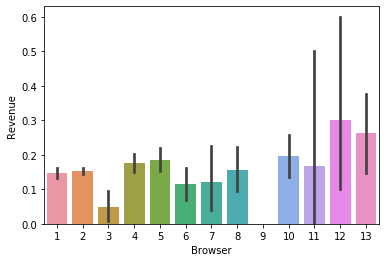

In [518]:
sns.barplot(x="Browser", y="Revenue", data=df)

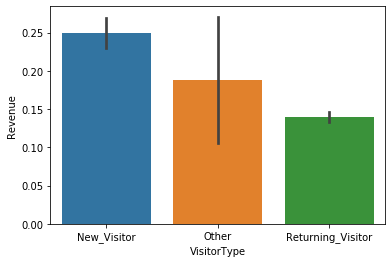

In [520]:
sns.barplot(x="VisitorType", y="Revenue", data=df)

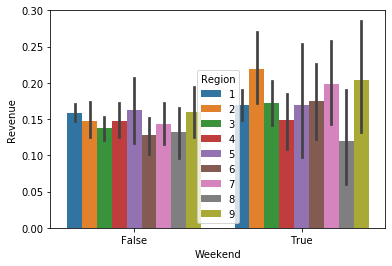

In [519]:
sns.barplot(x="Weekend", y="Revenue", hue = "Region", data=df)

### Looking for missing values

In [521]:
serie = df.isnull().sum(axis=0)
serie

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

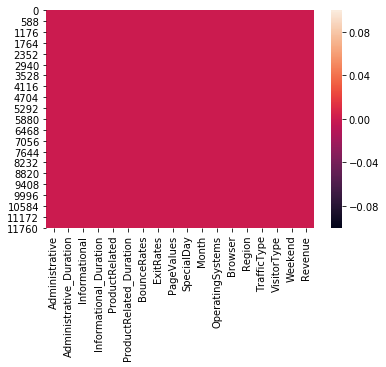

In [522]:
sns.heatmap(df.isnull())

### There is not any missing values

# Data Cleaning



### Correlation Matrix

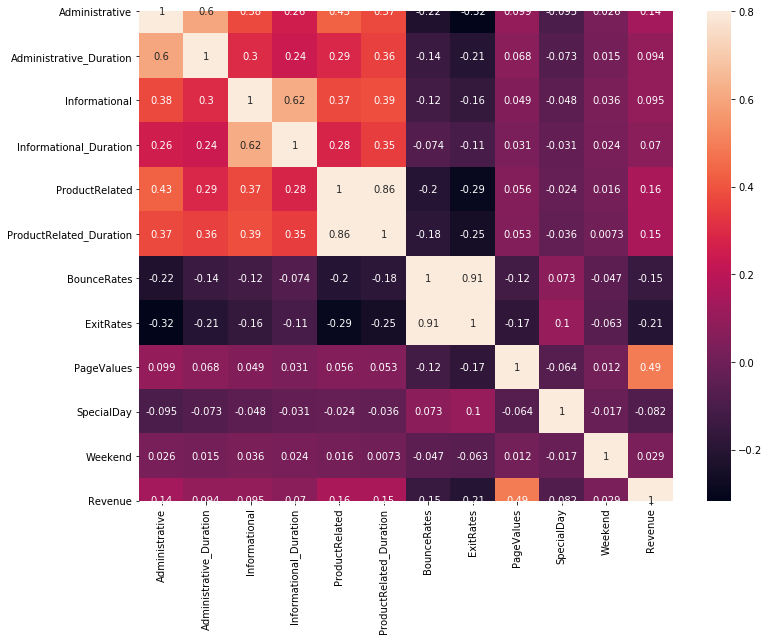

In [523]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);


With the correlation matrix, we could see that some features are more important for the mode, like the PageValues than others, like TrafficType

In [524]:
df.drop("TrafficType", axis=1, inplace=True)#Low correlation with Revenue
#df.drop("ProductRelated_Duration",axis=1, inplace=True)# High correlation with Duration
df.drop("Informational_Duration",axis=1, inplace=True)# High correlation with informational
df.drop("BounceRates",axis=1, inplace=True) # 0.91 correlation with exitRates so almost the same
df.drop("Region",axis=1, inplace=True)#Low correlation with Revenue


# Modelling

### Separation of the features and the target

In [525]:
X, y = df.drop("Revenue", axis=1), df.Revenue


### Transformation of categoricals features which were objects

In [526]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[["VisitorType"]] = encoder.fit_transform(X[["VisitorType"]])
encoder.categories_
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[["Month"]] = encoder.fit_transform(X[["Month"]])
encoder.categories_
X.head()


,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,VisitorType,Weekend
0,0,0.0,0,1,0.000000,0.20,0.0,0.0,2.0,1,1,2.0,False
1,0,0.0,0,2,64.000000,0.10,0.0,0.0,2.0,2,2,2.0,False
2,0,0.0,0,1,0.000000,0.20,0.0,0.0,2.0,4,1,2.0,False
3,0,0.0,0,2,2.666667,0.14,0.0,0.0,2.0,3,2,2.0,False
4,0,0.0,0,10,627.500000,0.05,0.0,0.0,2.0,3,3,2.0,True


In [527]:
X.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
ProductRelated                int64
ProductRelated_Duration     float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                       float64
OperatingSystems           category
Browser                    category
VisitorType                 float64
Weekend                        bool
dtype: object

In [528]:
X.VisitorType.value_counts()

2.0    10551
0.0     1694
1.0       85
Name: VisitorType, dtype: int64

In [529]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

The information still the same

### Splitting the data

In [530]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic regression

In [531]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))*100

C:\Users\Damien\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


88.44282238442823

without Month and VisitorType

- ProdRel_Du - Info_dur = 87.99675587996757
- ProdRel_Du - Info_dur - TrafficType = 88.28061638280616
- ProdRel_Du - Info_dur - TrafficType - BounceRates = 88.64557988645579
- Info_dur - TrafficType - BounceRates = 89.09164639091647
- ProdRel_Du  - TrafficType - BounceRates = 87.71289537712896


### Random Forest with 200 trees

In [532]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
rf_predictions=rf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=rf_predictions)*100

90.42984590429846

### Bagging with 200 trees

In [533]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier( n_estimators=200)
bagging.fit(X_train, y_train)
bagging_predictions=bagging.predict(X_test)
accuracy_score(y_true=y_test, y_pred=bagging_predictions)*100

89.86212489862126

### Boosting with 200 trees

In [534]:
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier(n_estimators=200)
boosting.fit(X_train, y_train)
boosting_predictions=boosting.predict(X_test)
accuracy_score(y_true=y_test, y_pred=boosting_predictions)*100


89.213300892133

# Deploying the model into Flask

In [497]:
from joblib import dump,load
dump(rf,"OnlineShoppersPurchasingIntention.joblib")

['OnlineShoppersPurchasingIntention.joblib']